In [1]:
import cv2
from forward import image_gen_emb_w
from utils import PSNR
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image1 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\png\\Lena.png")
w_image1 = image_gen_emb_w(image1,7,13,11)
# image2 = cv2.imread("D:\Dat_Hoctap\\2023\\Tamper_Recover\Data\\png\\airplane.png")
# w_image2 = image_gen_emb_w(image2,137,17,19)
# image3 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\Data\\png\\Lake_original.png")
# w_image3 = image_gen_emb_w(image3,137,17,19)
# image4 = cv2.imread("D:\\Dat_Hoctap\\2023\\Tamper_Recover\Data\\png\\peppers.png")
# w_image4 = image_gen_emb_w(image4,137,17,19)
print("PSNR1",cv2.PSNR(image1,w_image1))
# print("PSNR2",cv2.PSNR(image2,w_image2))
# print("PSNR3",cv2.PSNR(image3,w_image3))
# print("PSNR4",cv2.PSNR(image4,w_image4))


40.72639160837668
PSNR1 40.72639160837668


In [3]:
N = 512
t_all_image = np.random.randint(
    low=0, 
    high=256,
    size=(N, N, 3),
    dtype=np.uint8
)

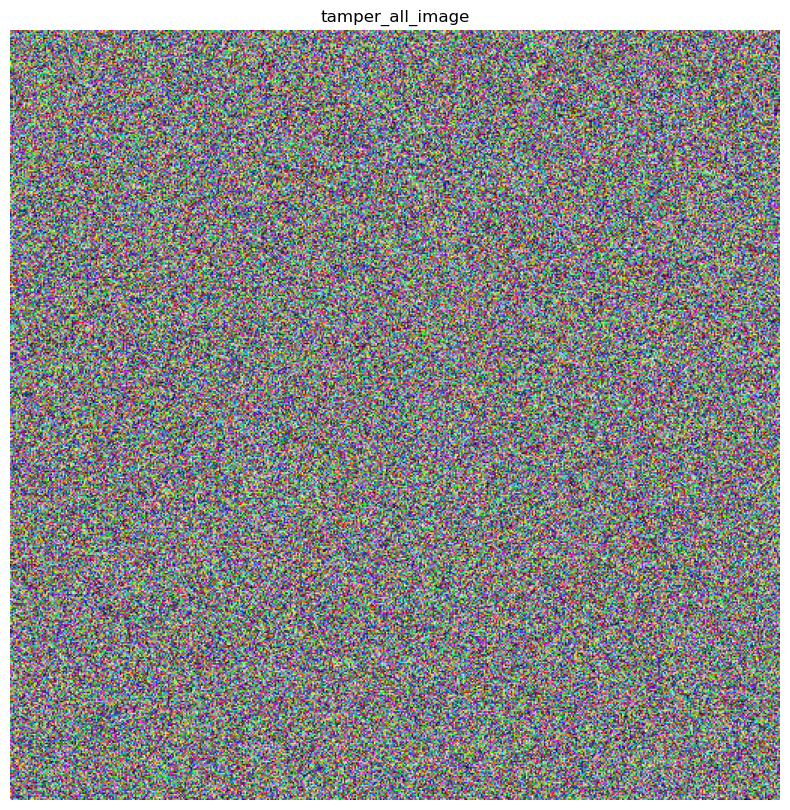

In [4]:
fig, axes = plt.subplots(figsize = (10,10))
axes.set_axis_off()
axes.set_title(f'tamper_all_image')
axes.imshow(cv2.cvtColor(t_all_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [5]:
# w_str1 = f'PSNR: {PSNR(image1,w_image1):.4f}'
# w_str2 = f'PSNR: {PSNR(image2,w_image2):.4f}'
# w_str3 = f'PSNR: {PSNR(image3,w_image3):.4f}'
# w_str4 = f'PSNR: {PSNR(image4,w_image4):.4f}'

# fig, axes = plt.subplots(2, 4,figsize = (20,10))

# axes[0,0].set_title('Host_image \n')
# axes[0,1].set_title(f'Watermarked_image \n {w_str1}')
# axes[0,0].imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
# axes[0,1].imshow(cv2.cvtColor(w_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

# axes[0,2].set_title('Host_image \n')
# axes[0,3].set_title(f'Watermarked_image \n {w_str2}')
# axes[0,2].imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
# axes[0,3].imshow(cv2.cvtColor(w_image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

# axes[1,0].set_title('Host_image \n')
# axes[1,1].set_title(f'Watermarked_image \n {w_str3}')
# axes[1,0].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
# axes[1,1].imshow(cv2.cvtColor(w_image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

# axes[1,2].set_title('Host_image \n')
# axes[1,3].set_title(f'Watermarked_image \n {w_str4}')
# axes[1,2].imshow(cv2.cvtColor(image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
# axes[1,3].imshow(cv2.cvtColor(w_image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [6]:
import numpy as np

tamper_image = w_image1.copy()
tamper_image[:,256:,:]= t_all_image[:,256:,:]
# tamper_image[230:282,230:282,:]= np.zeros((52,52,3),dtype=np.uint8)

In [7]:
from detect import *
level_1BGR,_ = level_one_detection(tamper_image,7,13,11)
# detec_2 = level_two_detection(detec_1)
# detec_3 = level_three_detection(detec_2)

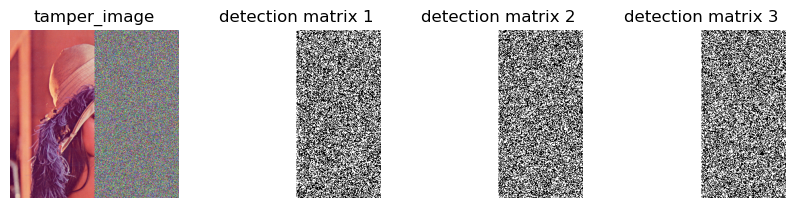

In [8]:
fig, axes = plt.subplots(1, 4,figsize = (10,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'detection matrix 1')
axes[2].set_title(f'detection matrix 2')
axes[3].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(level_1BGR[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(level_1BGR[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(level_1BGR[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [9]:
tamper_image1 = w_image1.copy()
tamper_image1[256-81:256+81,256-81:256+81,:]= t_all_image[256-81:256+81,256-81:256+81,:]

In [10]:
print(np.sqrt(512*512*8/10))
print(458/2)

457.9467217919569
229.0


In [11]:
level_1BGR1,_ = level_one_detection(tamper_image1,7,13,11)
level_2BGR1 = level_two_detection(level_1BGR1)
level_3BGR1 = level_three_detection(level_2BGR1)
final_detection =level_final_detection( level_3BGR1[:,:,0]& level_3BGR1[:,:,1]&level_3BGR1[:,:,2])

In [12]:
total_n_detect = np.where(final_detection==False)
print(len(total_n_detect[0])*4)

26212


In [13]:
print(162*162)

26244


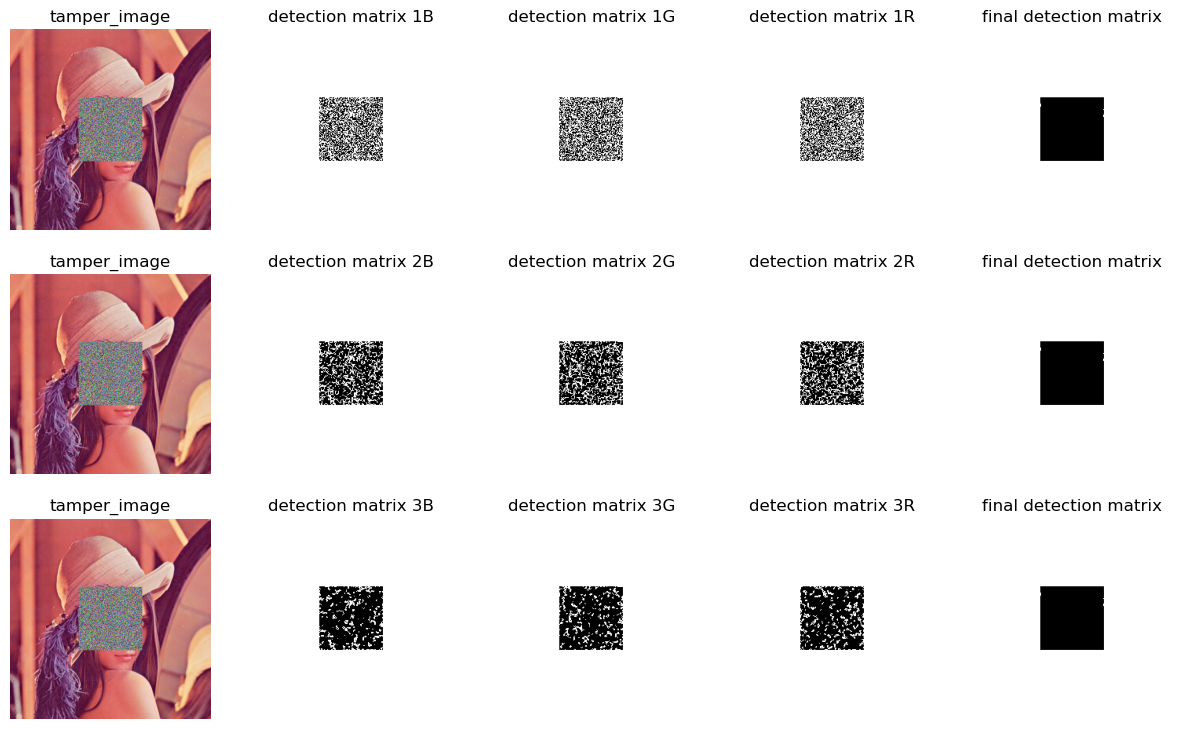

In [14]:
fig, axes = plt.subplots(3, 5,figsize = (15,9))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[0,2].set_axis_off()
axes[0,3].set_axis_off()
axes[0,4].set_axis_off()

axes[0,0].set_title(f'tamper_image')
axes[0,1].set_title(f'detection matrix 1B')
axes[0,2].set_title(f'detection matrix 1G')
axes[0,3].set_title(f'detection matrix 1R')
axes[0,4].set_title(f'final detection matrix')

axes[0,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(level_1BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,2].imshow(level_1BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,3].imshow(level_1BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,4].imshow(final_detection, cmap=plt.cm.gray,vmax=1,vmin=0)

axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,2].set_axis_off()
axes[1,3].set_axis_off()
axes[1,4].set_axis_off()

axes[1,0].set_title(f'tamper_image')
axes[1,1].set_title(f'detection matrix 2B')
axes[1,2].set_title(f'detection matrix 2G')
axes[1,3].set_title(f'detection matrix 2R')
axes[1,4].set_title(f'final detection matrix')

axes[1,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(level_2BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,2].imshow(level_2BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,3].imshow(level_2BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1,4].imshow(final_detection, cmap=plt.cm.gray,vmax=1,vmin=0)

axes[2,0].set_axis_off()
axes[2,1].set_axis_off()
axes[2,2].set_axis_off()
axes[2,3].set_axis_off()
axes[2,4].set_axis_off()


axes[2,0].set_title(f'tamper_image')
axes[2,1].set_title(f'detection matrix 3B')
axes[2,2].set_title(f'detection matrix 3G')
axes[2,3].set_title(f'detection matrix 3R')
axes[2,4].set_title(f'final detection matrix')

axes[2,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2,1].imshow(level_3BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2,2].imshow(level_3BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2,3].imshow(level_3BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2,4].imshow(final_detection, cmap=plt.cm.gray,vmax=1,vmin=0)

In [15]:
from recovery import stage_1_recovery,stage_2_recovery
recover_img1,detection_4 = stage_1_recovery(tamper_image1,7,13,11)
recover2_img1 = stage_2_recovery(recover_img1,detection_4)

720


In [16]:
print(464/4)

116.0


In [17]:
r_str1 = f'PSNR: {cv2.PSNR(image1,recover_img1):.4f}'
r2_str = f'PSNR:{cv2.PSNR(image1,recover2_img1):.4f}'
r_str2022 = f'PSNR: {37.96:.4f}'
print(r_str1)
print(r2_str)

PSNR: 32.3259
PSNR:32.1118


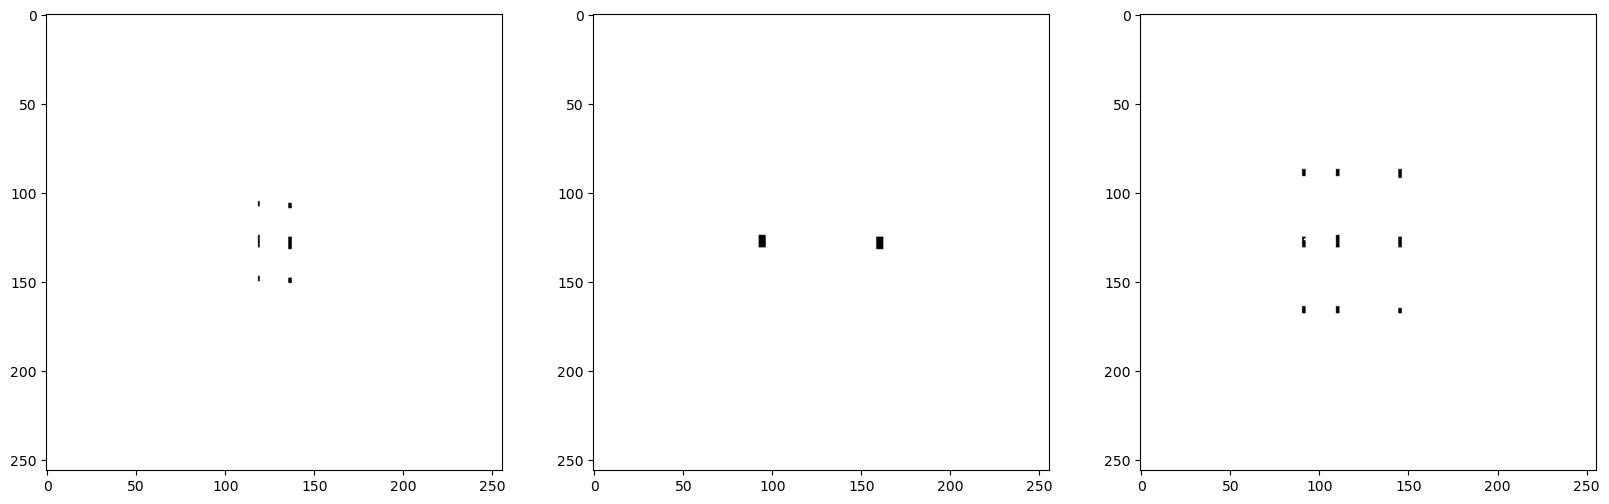

In [18]:
fig, axes = plt.subplots(1,3,figsize = (20,10))
axes[0].imshow(detection_4[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[1].imshow(detection_4[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(detection_4[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [19]:
mask1 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not detection_4[int(i/2),int(j/2),0]:
            mask1[i,j] = 255
mask2 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not detection_4[int(i/2),int(j/2),1]:
            mask2[i,j] = 255
mask3 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not detection_4[int(i/2),int(j/2),2]:
            mask3[i,j] = 255

In [20]:
dst = tamper_image1.copy()

In [21]:
dst[:,:,0] = cv2.inpaint(recover_img1[:,:,0],mask1,7,cv2.INPAINT_TELEA)
dst[:,:,1] = cv2.inpaint(recover_img1[:,:,1],mask2,7,cv2.INPAINT_TELEA)
dst[:,:,2] = cv2.inpaint(recover_img1[:,:,2],mask3,7,cv2.INPAINT_TELEA)


In [22]:
print(cv2.PSNR(dst,image1))

33.268735862768665


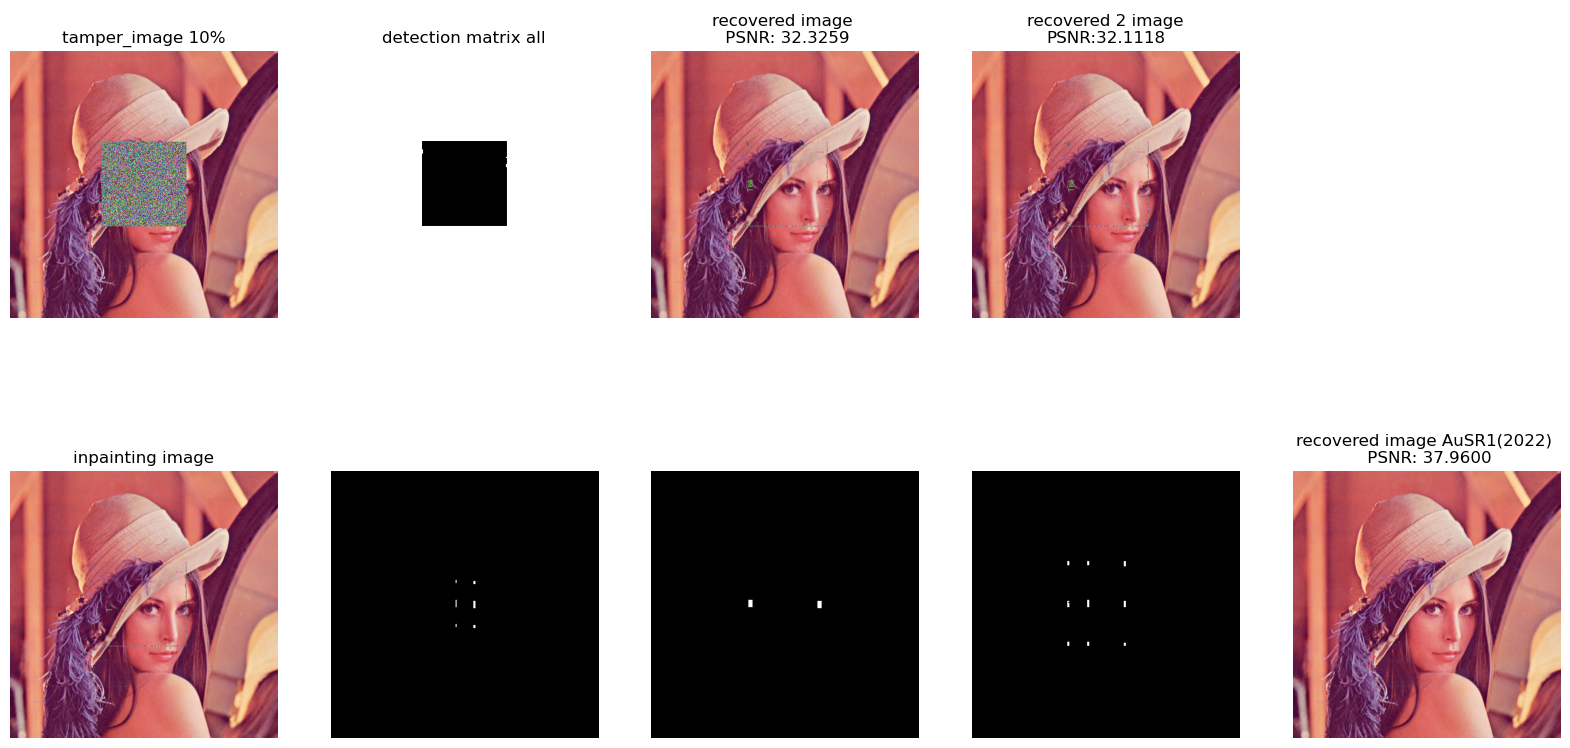

In [23]:
fig, axes = plt.subplots(2,5,figsize = (20,10))
axes[0,0].set_axis_off()
axes[0,1].set_axis_off()
axes[0,2].set_axis_off()
axes[0,3].set_axis_off()
axes[0,4].set_axis_off()

axes[0,0].set_title(f'tamper_image 10%')
axes[0,1].set_title(f'detection matrix all')
axes[0,2].set_title(f'recovered image \n {r_str1}')
axes[0,3].set_title(f'recovered 2 image\n{r2_str}')


axes[0,0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[0,1].imshow(final_detection, cmap=plt.cm.gray,vmax=1,vmin=0)
axes[0,2].imshow(cv2.cvtColor(recover_img1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,3].imshow(cv2.cvtColor(recover2_img1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)


axes[1,0].set_axis_off()
axes[1,1].set_axis_off()
axes[1,2].set_axis_off()
axes[1,3].set_axis_off()
axes[1,4].set_axis_off()

axes[1,0].set_title(f'inpainting image')

axes[1,4].set_title(f'recovered image AuSR1(2022) \n {r_str2022}')

axes[1,0].imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(mask1, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,2].imshow(mask2, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,3].imshow(mask3, cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,4].imshow(cv2.cvtColor(w_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [24]:
import sys
sys.path.append("..")
from Re_lee2008.detect import level_three_detection as lv3

final_detection = np.logical_and(level_3BGR1[:,:,0],level_3BGR1[:,:,1])
final_detection = lv3( np.logical_and(final_detection,level_3BGR1[:,:,2]))
final_detection = lv3(final_detection)

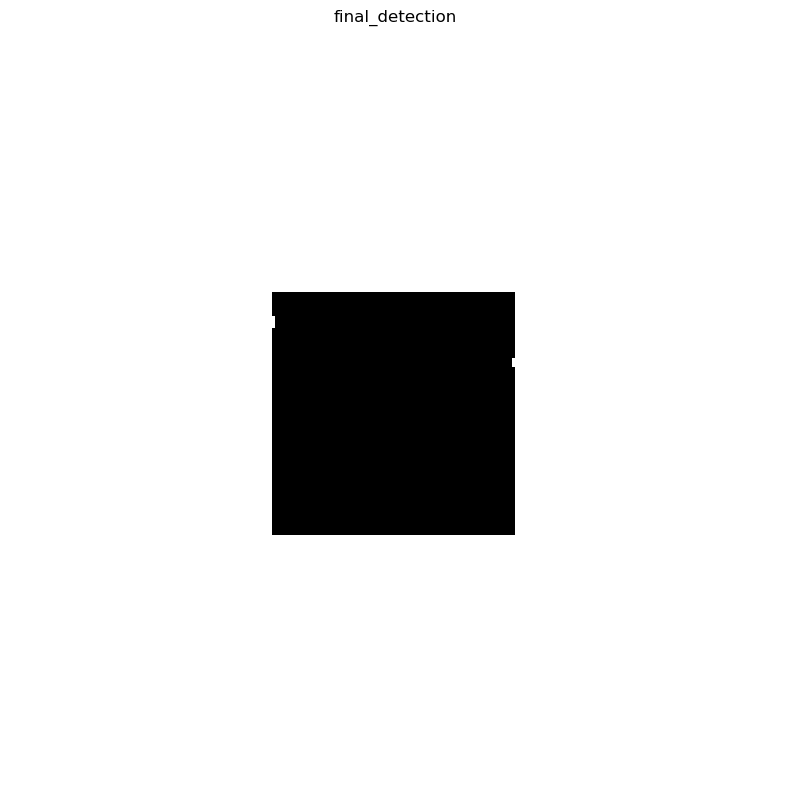

In [25]:
fig, axes = plt.subplots(figsize = (10,10))
axes.set_axis_off()
axes.set_title(f'final_detection')
axes.imshow(final_detection, cmap=plt.cm.gray,vmax=1,vmin=0)